In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline


Review the data types and sample data to understand what variables we are dealing with?
Which variables need to be transformed in some way before they can be analyzed?

In [6]:
df=pd.read_csv("automobile.txt")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [17]:
# See the dimensions of the dataset
df.shape

(205, 26)

In [10]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [13]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
df.shape

(205, 26)

As we can see there is huge discrepancies in normalize losses column and few others columns as well, where we can observed "?" symbol is used in place of NULL value. Let's detect all the null values present in the dataset and clean it up.

In [18]:
#List of columns that contain a "?" for missing data
cols = list(df.columns)
for col in cols:
    if('?' in df[col].value_counts()):
        print(col + " - " + str(df[col].value_counts()['?']))

normalized-losses - 41
num-of-doors - 2
bore - 4
stroke - 4
horsepower - 2
peak-rpm - 2
price - 4


Here we will have to repace missing data ("?") as NAN, so that further it will help us cleanup the data.

In [19]:
df.replace("?", np.NAN, inplace=True)

In [22]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

C:\Users\Arshad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


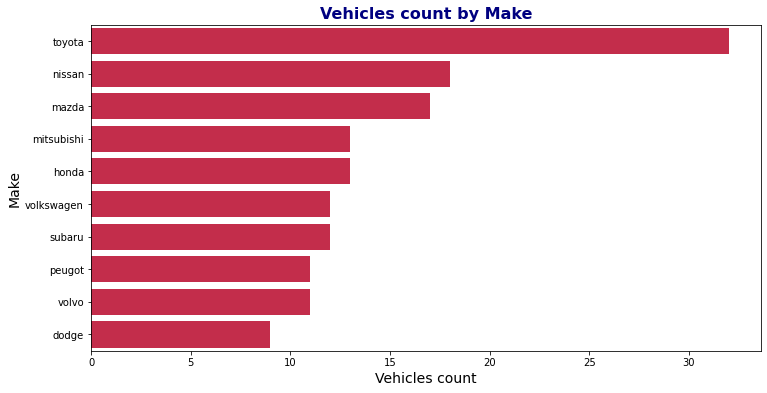

In [28]:
title_color = "navy"
plot_color = "crimson"
plot_alt_color = "coral"
plot_color_secondary = "deepskyblue"
y_title_margin = 1.0



fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Vehicles count by Make", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

top_10_makers = df["make"].value_counts()[:10].to_frame()
symbol_dist = sns.barplot(top_10_makers["make"],top_10_makers.index, color=plot_color, ax=ax)
symbol_dist.set_ylabel('Make',fontsize=14 )
symbol_dist.set_xlabel('Vehicles count',fontsize=14)
xticks(rotation=0)

fig.savefig('make_dist.png',dpi=fig.dpi,bbox_inches='tight')

vehicle count based on Makers

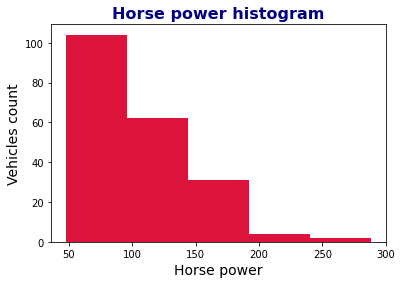

In [31]:
fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Horse power histogram", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.distplot(df['horsepower'], bins=5, kde = False, ax=ax, hist_kws={"linewidth": 1, "alpha": 1, "color": plot_color})
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Horse power',fontsize=14)

fig.savefig('horsepower_dist.png',dpi=fig.dpi,bbox_inches='tight')

C:\Users\Arshad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


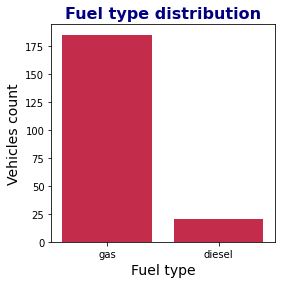

In [33]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)
ax.set_title("Fuel type distribution", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

symbol_dist = sns.countplot(df["fuel-type"], color=plot_color, ax=ax)
symbol_dist.set_ylabel('Vehicles count',fontsize=14 )
symbol_dist.set_xlabel('Fuel type',fontsize=14)

fig.savefig('fuel_type_dist.png',dpi=fig.dpi,bbox_inches='tight')

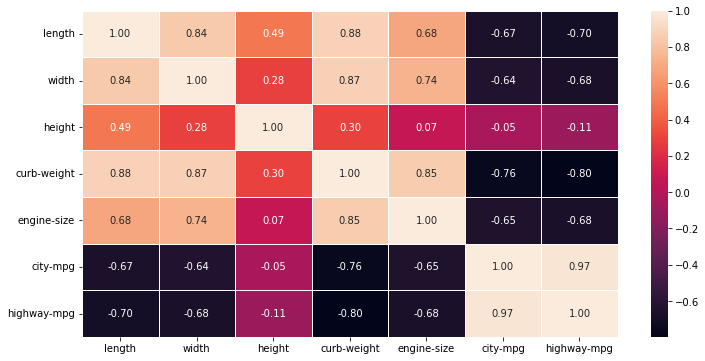

In [37]:
plt.figure(figsize=(12,6))
cols = ['length','width','height','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','price']
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', linewidths=.5)

plt.savefig('automobile_dataset_price_cor.png', bbox_inches='tight')

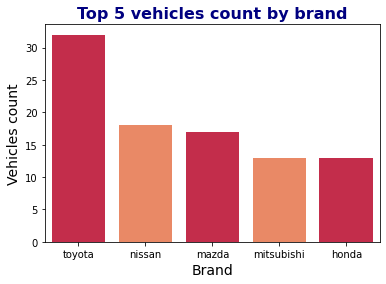

In [48]:
top_5_makers = df["make"].value_counts()[:5].to_frame().reset_index()
maker_cols = top_5_makers["index"].tolist()

fig, ax = plt.subplots(figsize=(6,4), ncols=1, nrows=1)
fig.patch.set_alpha(0.5)

ax.set_title("Top 5 vehicles count by brand", y = y_title_margin, color=title_color, fontsize=16, fontweight="bold")
col_dist = sns.countplot(data=df[df.make.isin(maker_cols)], order=maker_cols, x="make", ax=ax, palette=[plot_color, plot_alt_color])

col_dist.set_ylabel('Vehicles count', fontsize=14 )
col_dist.set_xlabel('Brand', fontsize=14)
fig.savefig('top_5_cars_by_brand_bar.png',dpi=fig.dpi,bbox_inches='tight')

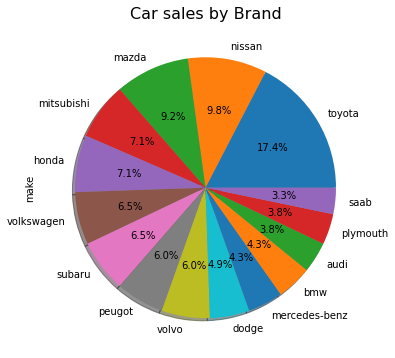

In [49]:
df["make"].value_counts()[:15].plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(6,6))
plt.title('Car sales by Brand', fontsize=16)

plt.savefig('cars_sales_by_brand_pie.png', bbox_inches='tight')

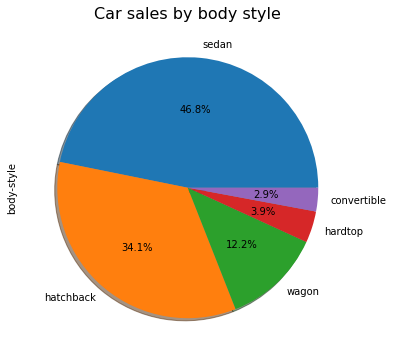

In [51]:
df["body-style"].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(6,6))
plt.title('Car sales by body style', fontsize=16)

plt.savefig('cars_sales_by_body_style_pie.png', bbox_inches='tight')